# Lab02: Frequent itemset mining

- Student ID: 21127240
- Student name: Nguyễn Phát Đạt

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**

- Frequent itemset mining.

# 1. Preliminaries
## This is how it all started ...
- Rakesh Agrawal, Tomasz Imielinski, Arun N. Swami: Mining Association Rules between Sets of Items in Large Databases. SIGMOD Conference 1993: 207-216
- Rakesh Agrawal, Ramakrishnan Srikant: Fast Algorithms for Mining Association Rules in Large Databases. VLDB 1994: 487-499

**These two papers are credited with the birth of Data Mining**
## Frequent itemset mining (FIM)

Find combinations of items (itemsets) that occur frequently.
## Applications
- Items = products, transactions = sets of products someone bought in one trip to the store.
$\Rightarrow$ items people frequently buy together.
    + Example: if people usually buy bread and coffee together, we run a sale of bread to attract people attention and raise price of coffee.
- Items = webpages, transactions = words. Unusual words appearing together in a large number of documents, e.g., “Brad” and “Angelina,” may indicate an interesting relationship.
- Transactions = Sentences, Items = Documents containing those sentences. Items that appear together too often could represent plagiarism.

## Transactional Database
A transactional database $D$ consists of $N$ transactions: $D=\left\{T_1,T_2,...,T_N\right\}$. A transaction $T_n \in D (1 \le n \le N)$ contains one or more items and that $I= \left\{ i_1,i_2,…,i_M \right\}$ is the set of distinct items in $D$, $T_n \subset I$. Commonly, a transactional database is represented by a flat file instead of a database system: items are non-negative integers, each row represents a transaction, items in a transaction separated by space.

Example: 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

30 31 32 

33 34 35 

36 37 38 39 40 41 42 43 44 45 46 

38 39 47 48 

38 39 48 49 50 51 52 53 54 55 56 57 58 

32 41 59 60 61 62 

3 39 48 

63 64 65 66 67 68 



# Definition

- Itemset: A collection of one or more items.
    + Example: {1 4 5}
- **k-itemset**: An itemset that contains k items.
- Support: Frequency of occurrence of an itemset.
    + Example: From the example above, item 3 appear in 2 transactions so its support is 2.
- Frequent itemset: An itemset whose support is greater than or equal to a `minsup` threshold

# The Apriori Principle
- If an itemset is frequent, then all of its subsets must also be frequent.
- If an itemset is not frequent, then all of its supersets cannot be frequent.
- The support of an itemset never exceeds the support of its subsets.
$$ \forall{X,Y}: (X \subseteq Y) \Rightarrow s(X)\ge s(Y)$$


# 2. Implementation


## The Apriori algorithm
Suppose:

$C_k$ candidate itemsets of size k.

$L_k$ frequent itemsets of size k.

The level-wise approach of Apriori algorithm can be descibed as follow:
1. k=1, $C_k$ = all items.
2. While $C_k$ not empty:
    3. Scan the database to find which itemsets in $C_k$ are frequent and put them into $L_k$.
    4. Use $L_k$ to generate a collection of candidate itemsets $C_{k+1}$ of size k+1.
    5. k=k+1.

### Import library

In [18]:
from collections import defaultdict

### Read data
First we have to read data from database

In [19]:

def readData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1;
        for line in f:
            itemset=set(map(int,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

### Tree Projection

**I gave you pseudo code of Apriori algorithm above but we implement Tree Projection. Tell me the differences of two algorithms.**


**TODO:**

| Aspect | Apriori Algorithm | Tree Projection Algorithm |
| --- | --- | --- |
| **Approach** | Traditional approach | Different approach, uses a _depth-first_ search |
| **Itemset Generation** | Generates all k-itemsets and expands them | Generates all k+1-itemsets using a fixed prefix itemset and performs a recursive process until no more itemsets can be processed |
| **Search Strategy** | _Level-wise_ search | _Depth-first_ search |
| **Computational Efficiency** | May involve redundant computations | Potentially reduces redundant computations, enhancing overall efficiency of the mining process |
| **Memory Usage** | Requires more memory due to storing intermediate k-itemsets | May use less memory as it generates k+1-itemsets directly, reducing the need for storing intermediate results |
| **Algorithm Complexity** | Generally higher complexity due to multiple passes over the dataset | Lower complexity for some datasets, as it focuses on relevant k+1-itemsets directly |
| **Flexibility** | Limited flexibility in adapting to different data distributions | Adaptable to varying data distributions, especially in scenarios with skewed or imbalanced data |
| **Suitability** | Suitable for moderate-sized datasets with a balanced distribution of itemsets | Particularly effective for datasets with varying itemset sizes and distributions, including skewed data |


In [20]:
def joinset(a, b):
    '''
    Parameters
    -------------------
        2 itemsets a and b (of course they are at same branch in search space)

    -------------------
    return
        ret: itemset generated by joining a and b
    '''
    # TODO (hint: this function will be called in generateSearchSpace method.):
    if len(a) == 1:
        return [a[0], b[0]]
    
    # extract k-1 items
    sub_a = a[:-1]
    sub_b = b[:-1]
    # if k-1 items of the two sets are not identical
    if sub_a != sub_b:
        return -1

    # join
    sub_a.append(a[-1])
    sub_a.append(b[-1])
    return sub_a

class TP:
    def __init__(self, data=None, s=None, minSup=None):
        self.data = data
        self.s = {}

        for key, support in sorted(s.items(), key=lambda item: item[1]):
            self.s[key] = support
        # TODO: why should we do this, answer it at the markdown below?

        self.minSup = minSup
        self.L = {}  # Store frequent itemsets mined from database
        self.runAlgorithm()

    def initialize(self):
        """
        Initialize search space at first step
        --------------------------------------
        We represent our search space in a tree structure
        """
        tree = {}

        search_space = {}
        for item, support in self.s.items():
            search_space[item] = {}

            search_space[item]['itemset'] = [item]
            ''' 
            python set does not remain elements order
            so we use a list to extend it easily when create new itemset 
            but why we store itemset in data by a python set???? '''
            # TODO: study about python set and its advantages,
            # answer at the markdown below.

            search_space[item]['pruned'] = False
            # TODO:
            # After finish implementing the algorithm tell me why should you use this
            # instead of delete item directly from search_space and tree.

            search_space[item]['support'] = support

            tree[item] = {}
            '''
            Why should i store an additional tree (here it called tree)? 
            Answer: This really help in next steps.

            Remember that there is always a big gap from theory to practicality
            and implementing this algorithm in python is not as simple as you think.
            '''

        return tree, search_space

    def computeItemsetSupport(self, itemset):

        '''Return support of itemset'''
        # TODO (hint: this is why i use python set in data)
        set_itemset = set(itemset)
        support = 0
        for val in self.data.values():
            if set_itemset <= val:
                support += 1
        return support

    def get_sub_tree(self, k, tree, search_space, itter_node):
        if k == 0:
            return search_space[itter_node]['support']
        subtree = search_space[itter_node]
        for node in subtree.keys():
            k-=1
            self.get_sub_tree(k,tree,search_space,node)


    def prune(self, k, tree, search_space):

        '''
        In this method we will find out which itemset in current search space is frequent
        itemset then add it to L[k]. In addition, we prune those are not frequent itemsets.
        '''
        if self.L.get(k) is None: self.L[k] = []
        # TODO
        keys = list(tree.keys())
        for itemset_key in keys:
            itemset = search_space[itemset_key]['itemset']
            support = self.computeItemsetSupport(itemset)
            
            if support >= self.minSup:
                # If the itemset is frequent, add it to L[k]
                search_space[itemset_key]['support'] = support
                self.L[k].append((itemset, support))
            else:
                # If not frequent, prune the itemset
                search_space[itemset_key]['pruned'] = True


    def generateSearchSpace(self, k, tree, search_space):
        '''
        Generate search space for exploring k+1 itemset. (Recursive function)
        '''
        items = list(tree.keys())
        ''' print search_space.keys() you will understand  
         why we need an additional tree, '''
        l = len(items)
        self.prune(k, tree, search_space)
        if l == 0: return  # Stop condition
        for i in range(l - 1):
            sub_search_space = {}
            sub_tree = {}
            a = items[i]
            if search_space[a]['pruned']: continue

            for j in range(i + 1, l):
                b = items[j]
                search_space[a][b] = {}
                tree[a][b] = {}
                # You really need to understand what am i doing here before doing work below.
                # (Hint: draw tree and search space to draft).

                # TODO:
                # First create newset using join set
                newset = joinset(search_space[a]['itemset'], search_space[b]['itemset'])
                
                # Second add newset to search_space
                search_space[a][b]['itemset'] = newset
                search_space[a][b]['pruned'] = False
                
                if j == l - 1:
                    sub_tree = tree[a]
                    sub_search_space = search_space[a]
            #  Generate search_space for k+1-itemset
            self.generateSearchSpace(k + 1, sub_tree, sub_search_space)

    def runAlgorithm(self):
        tree, search_space = self.initialize()  # generate search space for 1-itemset
        self.generateSearchSpace(1, tree, search_space)

    def miningResults(self):
        return self.L

Ok, let's test on a typical dataset `chess`.

In [21]:
data, s= readData('chess.txt')

In [22]:
#
a=TP(data=data,s=s, minSup=3000)
print(a.miningResults())

{1: [([48], 3013), ([56], 3021), ([66], 3021), ([34], 3040), ([62], 3060), ([7], 3076), ([36], 3099), ([60], 3149), ([40], 3170), ([29], 3181), ([52], 3185), ([58], 3195)], 2: [([48, 52], 3002), ([48, 58], 3012), ([56, 29], 3006), ([56, 52], 3016), ([56, 58], 3020), ([66, 60], 3021), ([66, 29], 3013), ([66, 52], 3010), ([66, 58], 3020), ([34, 40], 3017), ([34, 29], 3036), ([34, 52], 3031), ([34, 58], 3039), ([62, 60], 3014), ([62, 40], 3045), ([62, 29], 3045), ([62, 52], 3049), ([62, 58], 3060), ([7, 60], 3031), ([7, 40], 3050), ([7, 29], 3069), ([7, 52], 3065), ([7, 58], 3075), ([36, 60], 3052), ([36, 40], 3073), ([36, 29], 3084), ([36, 52], 3088), ([36, 58], 3098), ([60, 40], 3124), ([60, 29], 3136), ([60, 52], 3138), ([60, 58], 3148), ([40, 29], 3155), ([40, 52], 3159), ([40, 58], 3169), ([29, 52], 3170), ([29, 58], 3180), ([52, 58], 3184)], 3: [([48, 52, 58], 3001), ([56, 29, 52], 3001), ([56, 29, 58], 3005), ([56, 52, 58], 3015), ([66, 60, 29], 3013), ([66, 60, 52], 3010), ([66, 6

### Answer questions here:
**Why don't we compute support of items while reading data?**

- While reading the data, computing the support of each itemset would require iterating through the entire dataset for each item encountered, counting the occurrences of that item in each transaction, which can be computationally expensive and may lead to redundant calculations. Moreover, we may not encounter all the possible itemsets to count their support in a single reading time.

- By separating the process of reading data and computing item support, our code can efficiently traverse the dataset once to collect appearing itemsets and then perform a separate pass to calculate the support for each distinct item later. This approach reduces redundant operations and improves the overall efficiency of the algorithm.

**why should we do sort**

- We should sort the variable `s` based on the support of each item since this will help the algorithm ensures that the search space is explored in a specific order. This order is particularly important because it affects the pruning strategy during the generation of the search space.

- When generating the search space and deciding whether to prune certain itemsets, the algorithm considers their support. By sorting the items in ascending order of support, the algorithm can efficiently prune the less frequent (or potential) itemsets early. This optimization helps reduce the size of the search space and improves the overall efficiency of the mining algorithm.

**study about python set and its advantages ?**

- In Python, a _set_ is a built-in data type which is unordered (or not, based on the Python or interpreter version), mutable, iterable and contains only unique items by using the hash data structure.
- It stores unique items only, which helps us create an itemset or add an item to an itemset easier and faster (since we don't have to check if a item has appeared in a itemset already or not).
- By using hash, checking whether an element is present in a set is done instantly (with a time-complexity of O(1)) on average. This efficiency is crucial in the `computeItemsetSupport` method, where the algorithm needs to quickly determine if an item is part of a transaction.
- Python sets also support various mathematical set operations such as union, intersection, and difference.


**After finish implementing the algorithm tell me why should you use this? Instead of delete item directly from search_space and tree.**
- This allows the algorithm to mark items as pruned without immediately removing them from the data structures. This preserves the integrity of the data structures throughout the algorithm's execution. Directly deleting items might lead to complications or errors in later steps of the algorithm, as the tree needs to be restructured many times, which is rather inefficient.

- Also, it simplifies the traversal process by allowing the algorithm to quickly skip over pruned branches. This improves the overall efficiency of the search space exploration.

- Moreover, this strategy can also help us in debugging the algorithm or backtracking easier (since the pruned nodes are preserved).


**Apriori algorithm and Tree Projection, tell me the differences of two algorithms.**

| Aspect | Apriori Algorithm | Tree Projection Algorithm |
| --- | --- | --- |
| **Approach** | Traditional approach | Different approach, uses a _depth-first_ search |
| **Itemset Generation** | Generates all k-itemsets and expands them | Generates all k+1-itemsets using a fixed prefix itemset and performs a recursive process until no more itemsets can be processed |
| **Search Strategy** | _Level-wise_ search | _Depth-first_ search |
| **Computational Efficiency** | May involve redundant computations | Potentially reduces redundant computations, enhancing overall efficiency of the mining process |
| **Memory Usage** | Requires more memory due to storing intermediate k-itemsets | May use less memory as it generates k+1-itemsets directly, reducing the need for storing intermediate results |
| **Algorithm Complexity** | Generally higher complexity due to multiple passes over the dataset | Lower complexity for some datasets, as it focuses on relevant k+1-itemsets directly |
| **Flexibility** | Limited flexibility in adapting to different data distributions | Adaptable to varying data distributions, especially in scenarios with skewed or imbalanced data |
| **Suitability** | Suitable for moderate-sized datasets with a balanced distribution of itemsets | Particularly effective for datasets with varying itemset sizes and distributions, including skewed data |

# 3. Churn analysis

In this section, you will use frequent itemset mining technique to analyze `churn` dataset (for any purposes). 

*Remember this dataset is not represented as a transactional database, first thing that you have to do is transforming it into a flat file.  

In [23]:
# TODO
# YOUR CODE HERE

# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1. Data Exporation and Pre-processing

In [24]:
df = pd.read_csv('churn.txt')

# Print total rows, columns
print(f'(Rows: {df.shape[0]}, Columns: {df.shape[1]})')

(Rows: 3333, Columns: 21)


First, let's have a look at some samples of the data

In [25]:
df.head() # to show first 5 rows

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


- The `churn` dataset provides various information about customers and their interactions with the telecommunications service, such as their state, phone number, calls... and most importantly, the __churn__ feature indicates whether a customer has churned or not.

Next, we'll examine the quality of the data

In [26]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

- Good, the data don't have any missing values.

Unique values

In [27]:
df.nunique()

State               51
Account Length     212
Area Code            3
Phone             3333
Int'l Plan           2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn?               2
dtype: int64

- We can see that there's one feature (`Phone`) that have 3333 unique values which is equal to the number of rows of our data. The phone number of a customer is unrelevant to our analyzing process, instead, it can be used as a indentifier for a row or a customer. However, it's unnecessary in this case, so we will drop this column later.

Explore categorical variables

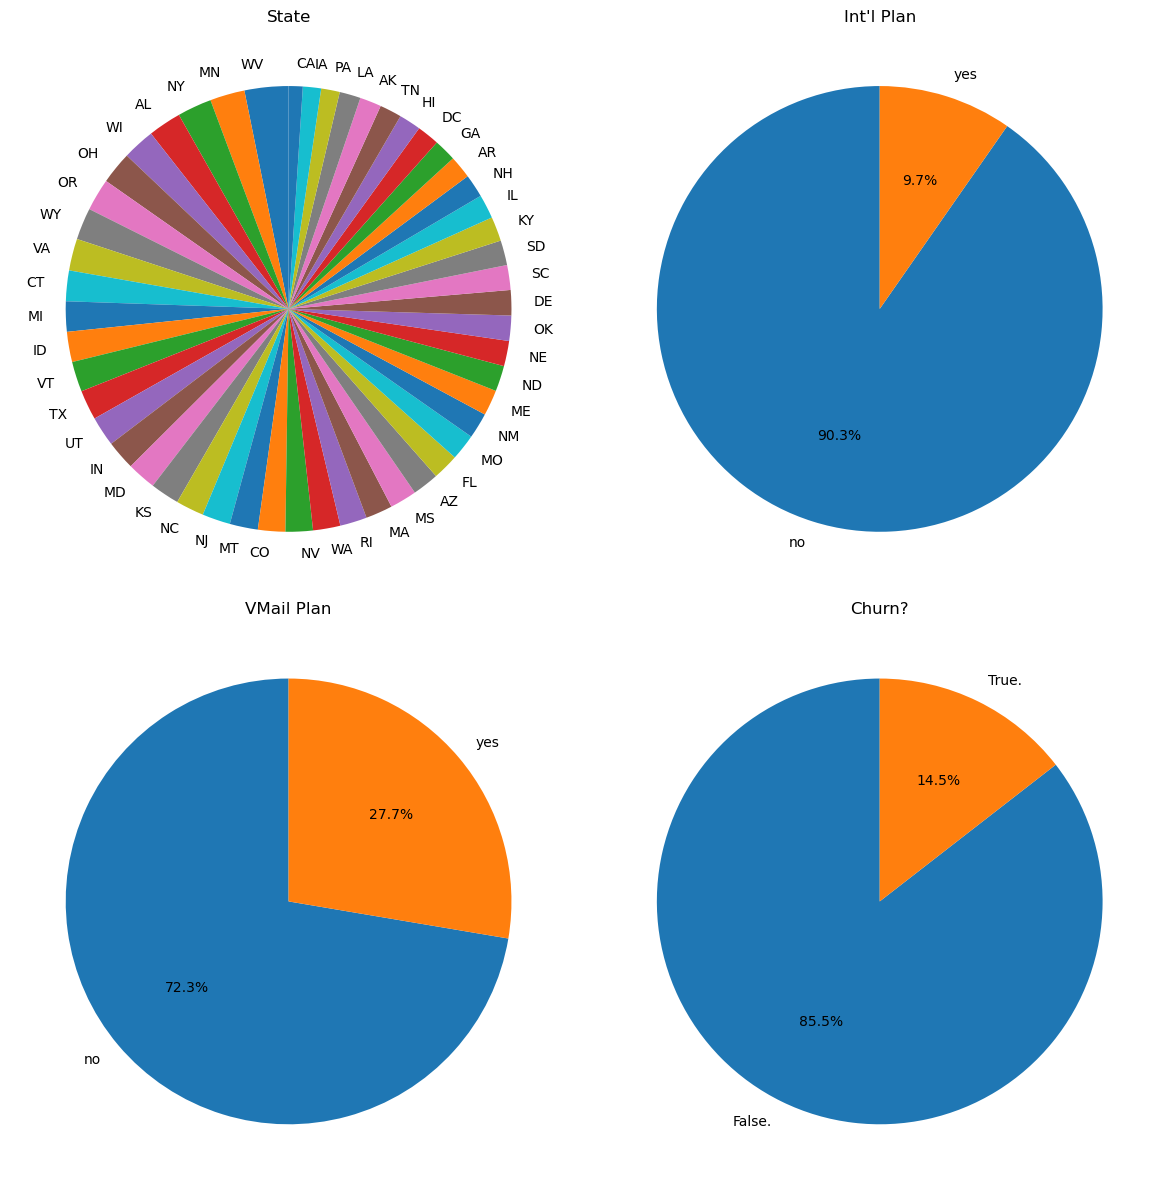

In [28]:
categorical_columns = df.drop(columns='Phone').select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Iterate through each categorical column and draw a pie chart
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values

    row, col = divmod(i, 2)
    if column == 'State':
        axes[row, col].pie(sizes, labels=labels, startangle=90) # hide percentages for state since there are too many
    else:
        axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(column)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

- It seems like this data is collected quite evenly from all states in the United States (as their proportions are relatively similar).
- Additionally, the remaining categorical columns exhibit a noticeable imbalance in proportions between the two classes.

In [29]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


To show it more clearly, let's have a look at the distribution of some numeric features

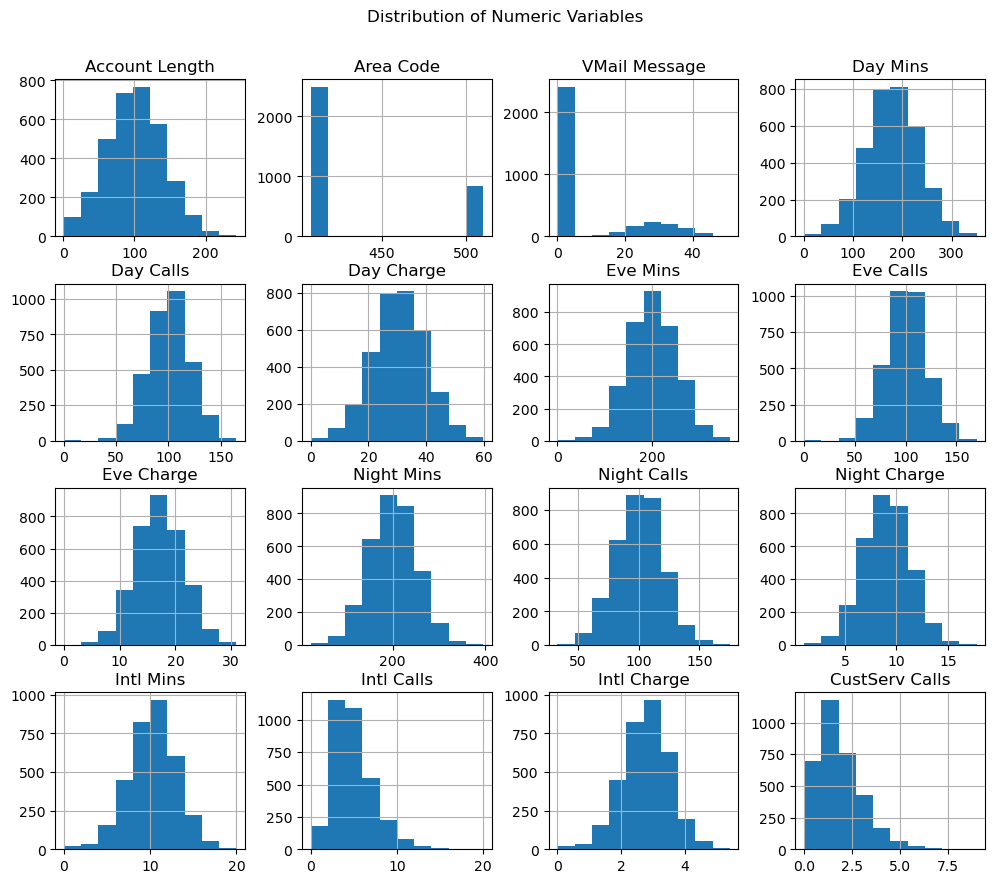

In [30]:
df.hist(figsize=(12, 10))
plt.suptitle('Distribution of Numeric Variables', y=0.95)
plt.show()

- Great! Most numeric features of this data follow a normal distribution, which can enhance the quality of our analysis results.
- Except for `Area Code` and `VMail Message` which are being very highly skewed. However, they won't affect the algorithm much (only make the algorithm generate more itemsets), so we can consider about keeping them to see if these features can form any useful factors that can help us in predicting churn.

Then, we can examine the correlation between various features

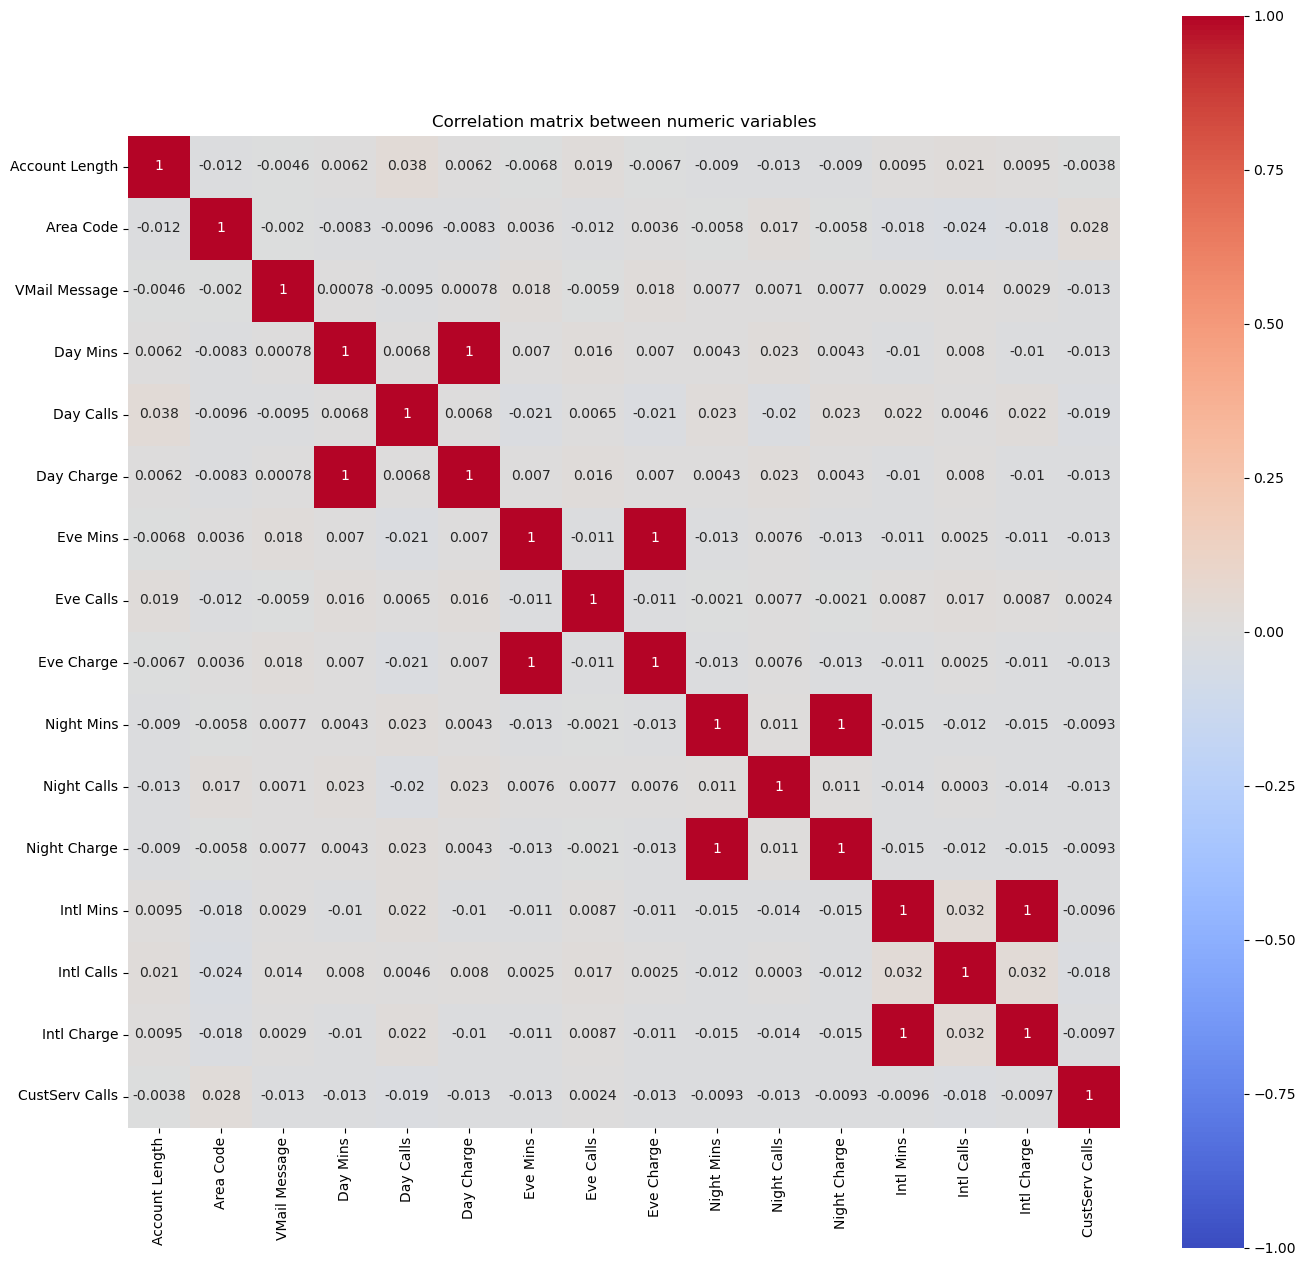

In [31]:
corr_df = df.corr(numeric_only=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.set_title('Correlation matrix between numeric variables')
sns.heatmap(corr_df, ax=ax, vmin=-1, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

- We can see that most variables exhibit a very weak correlation with each other in this dataset.
  
- Except for a few variable pairs like `Day Charge` and `Day Mins`, `Eve Charge` and `Eve Mins`... (variables with names ending in Charge and Mins), which exhibit a very strong positive correlation with each other. This could be because these variables may be calculated based on the values of the other variable; in this case, charges might be calculated based on the duration of the calls (in minute), leading to a strong correlation between them, which is understandable.
  
- Therefore, we can just remove one variable in each pair to reduce unnecessary calculations. Note that for consistent purpose, we should drop one type of each pair (either Charge or Mins) instead of choosing them randomly.

In [32]:
# here i drop Mins columns since they have larger scale than Charge
# and the Phone (mentioned above)
df = df.drop(['Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'Phone'], axis=1)
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.


Let's explore the relationships between some variables to get value insights before proceeding

First, my guess is there may exist a relationship which is customers who call more frequent (or longer) or using more customer call service may churn more. So let's plot a scatter plot to verify if these relationships exist.

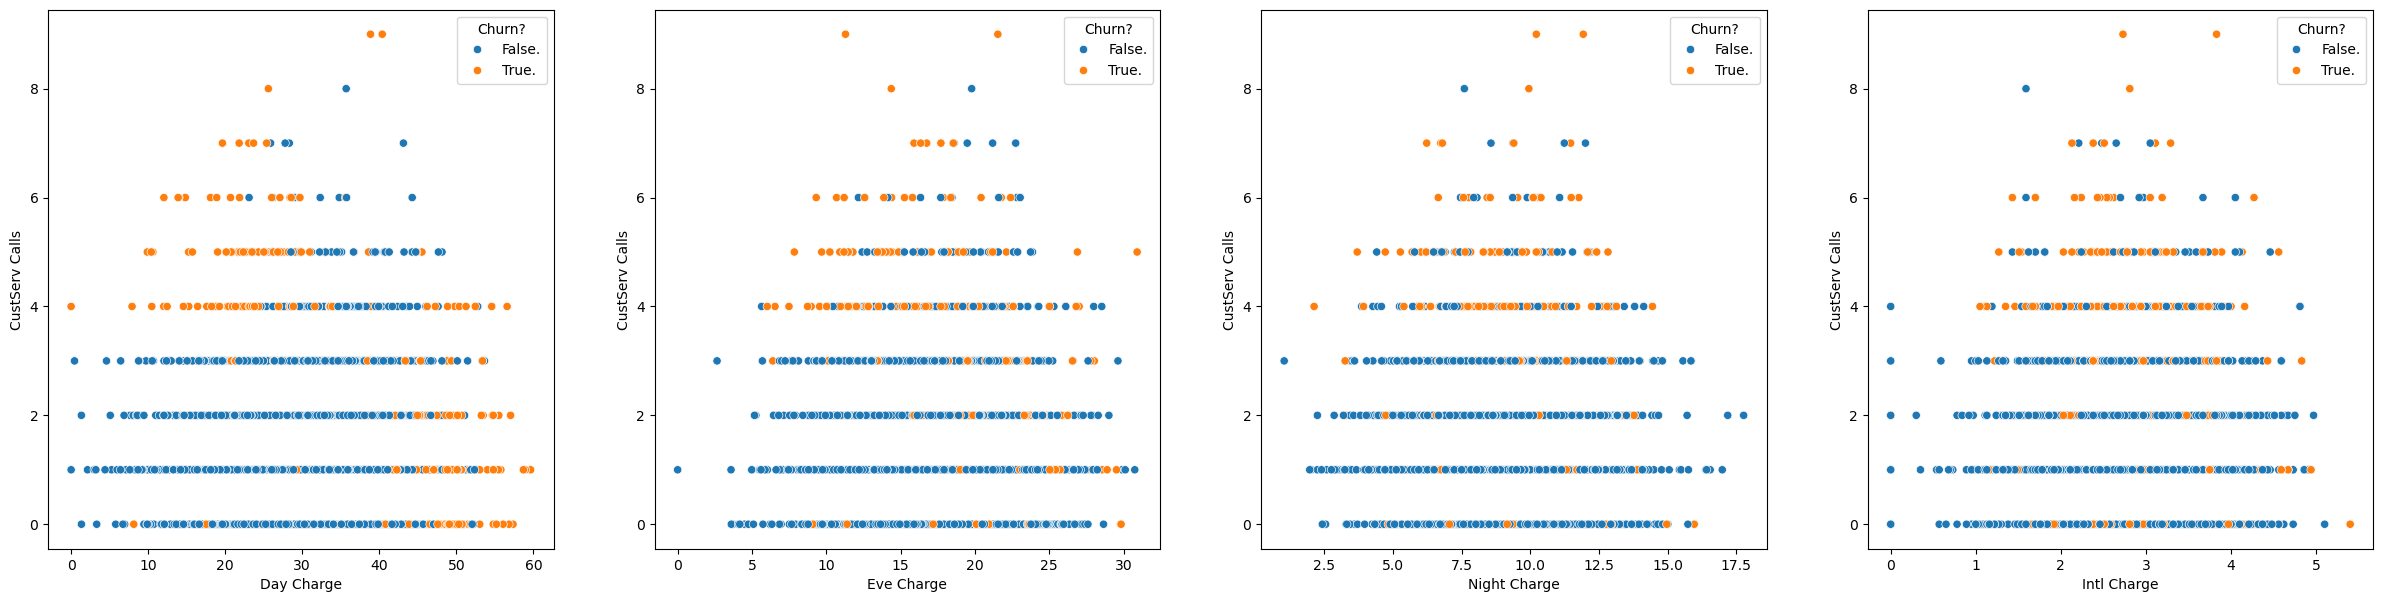

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(30, 7))

sns.scatterplot(data=df, x='Day Charge', y='CustServ Calls', hue='Churn?', ax=axes[0])

sns.scatterplot(data=df, x='Eve Charge', y='CustServ Calls', hue='Churn?', ax=axes[1])

sns.scatterplot(data=df, x='Night Charge', y='CustServ Calls', hue='Churn?', ax=axes[2])

sns.scatterplot(data=df, x='Intl Charge', y='CustServ Calls', hue='Churn?', ax=axes[3])

plt.show()

- There does not appear to be a clear relationship between a customer calling in the evening, night or internationally (except for day) and their churn rate. For the remaining feature, it seems that customers who use more customer services tend to churn more frequently no matter when they're calling.

- We can see that in the first plot, there are two possible scenarios that customers tend to churn with higher chance:
    - Customers who call longer (have been charged more) during the day and using less customer services.
    - Customers who use more customer service and call less (which contrasts to the case above).

Note that in other scenarios, customer are less likely to churn, which is understandable since a normal customer tends to use those services either very little or a lot (not in between like two of the above cases). However, we can expect these inferences may not work well with the FIM algorithm because the `CustServ Calls` column is slightly skewed so the algorithm may conclude this in both cases (churn and not churn).

After the above exploration, we may expect the `Day Charge` feature can affect the churn rate more than the other features (`Eve Charge`, `Night Charge` and `Intl Charge`).

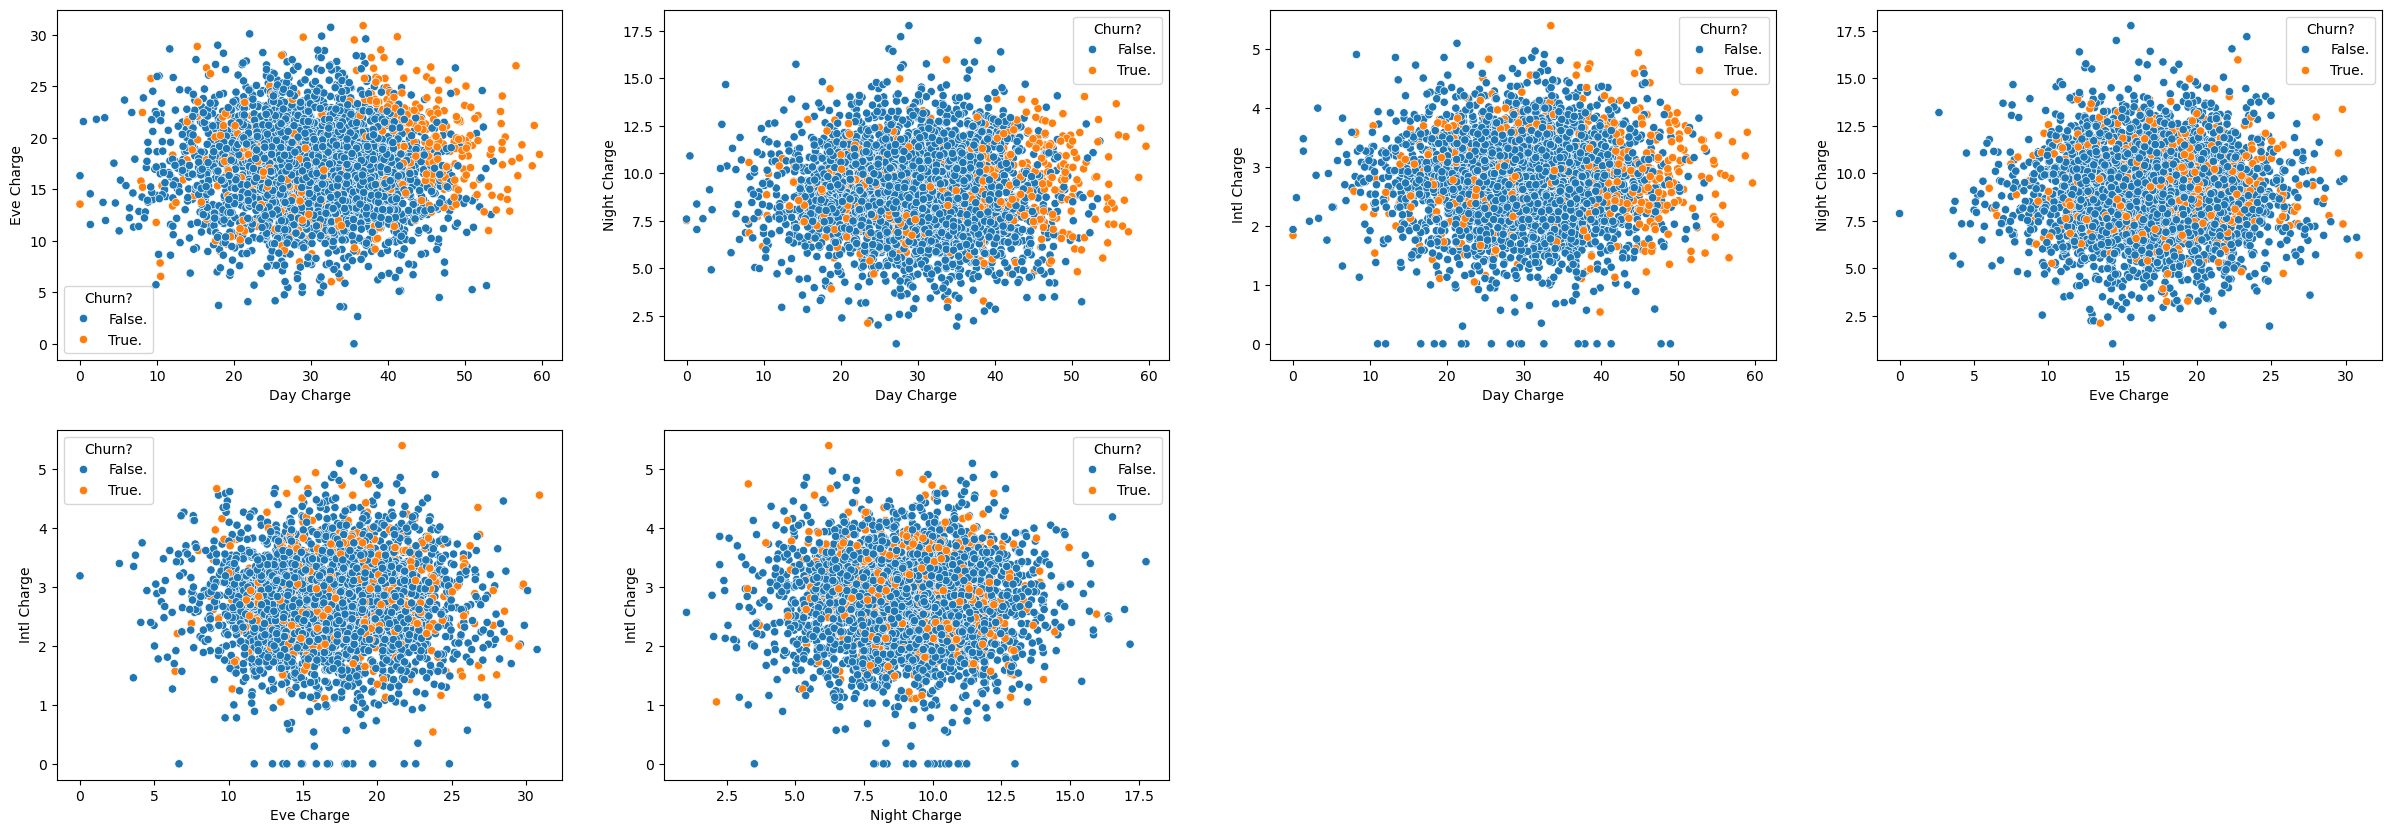

In [34]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(30, 10))

# Define scatter plot parameters and plot
scatter_params = [
    {'x': 'Day Charge', 'y': 'Eve Charge'},
    {'x': 'Day Charge', 'y': 'Night Charge'},
    {'x': 'Day Charge', 'y': 'Intl Charge'},
    {'x': 'Eve Charge', 'y': 'Night Charge'},
    {'x': 'Eve Charge', 'y': 'Intl Charge'},
    {'x': 'Night Charge', 'y': 'Intl Charge'}
]

for i, params in enumerate(scatter_params):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    sns.scatterplot(data=df, hue='Churn?', ax=ax, **params)

axes[1, 2].set_visible(False)
axes[1, 3].set_visible(False)


# Show the plot
plt.show()


- As expected, it seems that only the `Day Charge` attribute has an noteworthy impact on customer churn rate because in the plots above, we can see that only 3 of them (with `Day Charge`) are explicitly split between churn=True and False (in between high and low Day Charge). This demonstrates that customers who have high Day Charge (call more and longer during the day) have higher churn rates.

Before transforming this data into a transactional database, we should do __discretization__  on some continuous variables. This will help the algorithm works better, because if we leave too many distinct items (continuous values), the algorithm will generate too many itemsets, which makes it harder to count their frequency.

In this case, since most columns in our dataset already follow a normal distribution, opting for the straightforward equal-width binning method appears to be a suitable and practical choice. Furthermore, in practice, we know that there is a significant difference between a customer who makes a few calls and one who does not make any calls (between sending some voicemails and not sending any voicemails...). Therefore, we will assign a unique label for 0 values only.

_Note that since the feature `Area Code` only has 3 unique values and it seems that its values are intended for identification purposes only, we won't discretize it here._

In [35]:
# since the data is pretty small, and categorical columns only have a few unique values 
# here I use 3 bins only
num_bins = 3

labels = [
    'low',
    'medium',
    'high'
]

num_df = df.select_dtypes('number')

# save zero values location
zero_locations = num_df == 0

# Apply equal-width binning for each numeric columns
for column in num_df.columns:
    if column == 'Area Code':
        continue
    num_df[column] = pd.cut(num_df[column], bins=num_bins, labels=labels, include_lowest=True)
    num_df[column] = num_df[column].cat.add_categories('zero')

# replace 0 values with 'zero' label 
num_df = num_df.where(~zero_locations , 'zero') # use this instead of None since None usually indicates missing values


binned_df = df.copy()

binned_df[num_df.columns] = num_df

# result
binned_df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,medium,415,no,yes,medium,medium,high,medium,medium,medium,medium,low,medium,low,False.
1,OH,medium,415,no,yes,medium,high,medium,medium,medium,medium,medium,low,high,low,False.
2,NJ,medium,415,no,no,zero,high,high,medium,low,medium,medium,low,medium,zero,False.
3,OH,medium,408,yes,no,zero,medium,high,medium,low,medium,medium,medium,low,low,False.
4,OK,low,415,yes,no,zero,high,medium,high,medium,medium,medium,low,medium,low,False.


## 3.2. Frequent Itemset Mining for Churn Dataset

In this section, we will use Tree Projection algorithm to analyze and understand the factors leading to churn or to predict churn.

Transform this dataframe (after reading from the .csv file and some processing) into a transactional database (as a .txt file)

In [36]:
def to_transactional_database(df, file_name):
    with open(file_name, 'w') as f:
        for record in df.to_dict('records'):
            transaction = ' '.join([f"{key.replace(' ', '_')}={value}" for key, value in record.items()])
            f.write(transaction + '\n')

In [37]:
to_transactional_database(binned_df, 'transDB_churn.txt')

Here we will modify the read data function to work with str instead. Moreover, since we intended to understand factors that may lead to a possible churn (or not), we should analyze each groups (Churn?=True., Churn?=False.) separately.

In [38]:
def churn_readData(path, contain_str=None):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0)
    with open(path,'rt') as f:
        tid=1
        for line in f:
            if contain_str:
                if contain_str not in line:
                    continue
            itemset=set(map(str,line.split())) # modify here
            for item in itemset:  
                s[item]+=1    
            data[tid]= itemset
            tid+=1
    
    return data, s

Read data and apply Tree Projection algorithm on each class separately.

In [39]:
def get_miningResults(minSup, data, s, str_res):
    churn_tree = TP(data=data, s=s, minSup=minSup)

    n = len(data)
    for kth_itemsets in churn_tree.miningResults().values():
        print() # separated by each k
        for itemset, support in kth_itemsets:
            if str_res in itemset:
                print(f'Itemset: {itemset}, Support: {support} ({(support / n * 100):.2f} %)')

__Churn__

In [40]:
churn_data, churn_s = churn_readData('transDB_churn.txt', 'Churn?=True.')
print("Total transactions:", len(churn_data))

# define minSup
MIN_SUP = round(0.6 * len(churn_data))
print('minSup:', MIN_SUP)
print()

get_miningResults(MIN_SUP, churn_data, churn_s, 'Churn?=True.')

Total transactions: 483
minSup: 290


Itemset: ['Churn?=True.'], Support: 483 (100.00 %)

Itemset: ['Account_Length=medium', 'Churn?=True.'], Support: 306 (63.35 %)
Itemset: ['Day_Calls=medium', 'Churn?=True.'], Support: 307 (63.56 %)
Itemset: ['Eve_Charge=medium', 'Churn?=True.'], Support: 321 (66.46 %)
Itemset: ["Int'l_Plan=no", 'Churn?=True.'], Support: 346 (71.64 %)
Itemset: ['Intl_Charge=medium', 'Churn?=True.'], Support: 350 (72.46 %)
Itemset: ['Eve_Calls=medium', 'Churn?=True.'], Support: 353 (73.08 %)
Itemset: ['Night_Calls=medium', 'Churn?=True.'], Support: 353 (73.08 %)
Itemset: ['Night_Charge=medium', 'Churn?=True.'], Support: 394 (81.57 %)
Itemset: ['VMail_Plan=no', 'Churn?=True.'], Support: 403 (83.44 %)
Itemset: ['VMail_Message=zero', 'Churn?=True.'], Support: 403 (83.44 %)
Itemset: ['Intl_Calls=low', 'Churn?=True.'], Support: 412 (85.30 %)

Itemset: ["Int'l_Plan=no", 'VMail_Plan=no', 'Churn?=True.'], Support: 302 (62.53 %)
Itemset: ["Int'l_Plan=no", 'VMail_Message=zero',

__No churn__

In [41]:
churn_data, churn_s = churn_readData('transDB_churn.txt', 'Churn?=False.')
print("Total transactions:", len(churn_data))

# define minSup
MIN_SUP = round(0.6 * len(churn_data))
print('- minSup: ', MIN_SUP)
print()

get_miningResults(MIN_SUP, churn_data, churn_s, 'Churn?=False.')

Total transactions: 2850
- minSup:  1710


Itemset: ['Churn?=False.'], Support: 2850 (100.00 %)

Itemset: ['Account_Length=medium', 'Churn?=False.'], Support: 1769 (62.07 %)
Itemset: ['Day_Calls=medium', 'Churn?=False.'], Support: 1961 (68.81 %)
Itemset: ['VMail_Plan=no', 'Churn?=False.'], Support: 2008 (70.46 %)
Itemset: ['VMail_Message=zero', 'Churn?=False.'], Support: 2008 (70.46 %)
Itemset: ['Eve_Calls=medium', 'Churn?=False.'], Support: 2092 (73.40 %)
Itemset: ['CustServ_Calls=low', 'Churn?=False.'], Support: 2116 (74.25 %)
Itemset: ['Eve_Charge=medium', 'Churn?=False.'], Support: 2123 (74.49 %)
Itemset: ['Day_Charge=medium', 'Churn?=False.'], Support: 2151 (75.47 %)
Itemset: ['Night_Calls=medium', 'Churn?=False.'], Support: 2161 (75.82 %)
Itemset: ['Night_Charge=medium', 'Churn?=False.'], Support: 2211 (77.58 %)
Itemset: ['Intl_Charge=medium', 'Churn?=False.'], Support: 2257 (79.19 %)
Itemset: ['Intl_Calls=low', 'Churn?=False.'], Support: 2332 (81.82 %)
Itemset: ["Int'l_Plan=no",

__Insights:__

With the minSup of nearly 60% number of transactions, we can see there's some factors that may lead to a churn or not with a relatively high support:

- _Churn_
    - 1 factor:
        - `Intl_Calls=low`: makes a few international calls => churn
        - `VMail_Message=zero`: no voicemails  => churn
        - `VMail_Plan=no`: has no voicemail plan => churn
        - `Night_Charge=medium`: has been charged a medium ammount at night => churn
        - `Night_Calls=medium`: makes a medium number of calls at night => churn
        - `Int'l_Plan=no`: has no international plan => churn
        - ...
    - 2 factors:
        - `VMail_Message=zero`, `VMail_Plan=no`: has no voicemail plan and voicemail message  => churn
        - `VMail_Message=zero`, `Intl_Calls=low` : has no voicemail but makes a few international calls => churn
        - `VMail_Plan=no`, `Intl_Calls=low` : has no voicemail plan but makes a few international calls => churn     
        - ...
    - 3 factors:
        - `VMail_Message=zero`, `VMail_Plan=no`, `Intl_Calls=low`: has no voicemail plan and makes a few international calls and no voicemail => churn.
        - ...
    
    => It seems that customers using services without a plan but still utilizing those (voice or international) often exhibit a relatively high churn rate. Additionally, customers who call at night also have a noteworthy churn rate.

- _No churn_
    - 1 factor: 
        - `Int'l_Plan=no`: has no international plan => no churn
        - `Intl_Calls=low`: makes a few international calls => no churn
        - `Intl_Charge=medium`: has been charged a medium international ammount => no churn
        - `Day_Charge=medium`: has been charged a medium ammount during the day => churn
        - `Eve_Charge=medium`: has been charged a medium ammount in the evening => churn
        - `CustServ_Calls=low`: makes a few customer service calls => no churn
        - ...
    - 2 factors:
        - `Intl_Calls=low`, `Int'l_Plan=no`: has no international plan and makes a few international calls => no churn
        - `Intl_Charge=medium`, `Int'l_Plan=no`: has no international plan and has been charged a medium international ammount => no churn
        - `Day_Charge=medium`, `Int'l_Plan=no`: has no international plan and has been charged a medium ammount during the day => no churn
        - ...
        
    => It appears that for non-churning customers, they typically use the services during the daytime or in the evening. Moreover, they also tend to have a lower chance of having an international plan and higher chance of having voicemail plan when utilizing the services.

__Conclusion__

After completing some pre-processing tasks and applying FIM to this dataset, we have gathered some valuable insights (with a relatively high support) that can assist telecom service providers in predicting whether a customer will churn or not.

However, we can see that there may be some factors appear both in Churn=True or False. This is because those factors often have a skewed distribution, the only reason they appear in both groups is due to their high frequency in the data. Thus, they may not contribute much to whether a customer churn or not, which could possibly lead to wrong conclusions. 

This is indeed one of the limitations this algorithm, we can address this problem by performing more pre-processing or EDA tasks, using additional association rule metrics (such as the _confident_ or _correlation_...), or even remove unhelpful columns may help us in some case.